In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics as st
import numpy as np
import os

def readStats(path: str):
    x = []
    y = []
    with open(path, "r") as f:
        line = f.readline()
        while line: 
            tmp =[int(x) for x in line.split(" ")]
            x.append(tmp[0])
            y.append(tmp[1])
            line = f.readline()
    return processing(x,y)

def processing(x,y):
    sizes = list(set(x))
    sizes.sort()
    times = []
    for size in sizes: 
        time = []
        for i in range(0, len(x)):
            if x[i] == size:
                time.append(y[i])
        times.append(time)
    return (sizes, times)

def read_results(filename):
    sizes = []
    computation_times = []
    with open(filename, 'r') as file:
        while True:
            tmp = []
            size_line = file.readline().strip()
            if not size_line:
                break
            size = int(size_line)
            task_size = int(file.readline().strip())
            for i in range(0, 10):
                comp_time = file.readline().strip()
                if not comp_time:
                    break
                tmp.append(int(comp_time))

            sizes.append(size)
            computation_times.append(tmp)
    return sizes, computation_times



def plot_intervals(sizes, intervals):
    means = [interval[0] for interval in intervals]
    lower_bounds = [interval[1][0] for interval in intervals]
    upper_bounds = [interval[1][1] for interval in intervals]

    plt.errorbar(sizes, means, yerr=[(upper-lower)/2 for upper, lower in zip(upper_bounds, lower_bounds)], fmt='o-', capsize=5)
    plt.xlabel('Размер матрицы')
    plt.ylabel('Время умножения')
    plt.grid(True)
    plt.show()

def get_intervals(sizes, times):
    gamma = 0.95
    intervals = []
    for time in times:
        n = len(time)
        x_mean = np.mean(time)
        s = np.sqrt(st.variance(time))
        confidence_interval = sts.t.interval(gamma, df=n-1, loc=x_mean, scale=s/np.sqrt(n))
        intervals.append([x_mean, confidence_interval])
    return (sizes,intervals)

x = []
y = []
x, y = readStats("D:\git\multithreading\lab2/res\stats_lab2_t_1")
x.sort()
y.sort()
# plt.plot(x, y, label='lab1')


# x_2 = []
# y_2 = []
# x_2, y_2 = readStats("D:\git\multithreading\lab2/res\stats_lab2_t_12")
# x_2.sort()
# y_2.sort()
# plt.plot(x_2, y_2, label='lab2')




# plt.title("Time dependence on size")
# plt.xlabel("Size")
# plt.ylabel("Time")
# plt.legend()
# plt.show()

<>:79: SyntaxWarning: invalid escape sequence '\g'
<>:79: SyntaxWarning: invalid escape sequence '\g'
C:\Users\every\AppData\Local\Temp\ipykernel_20228\3023895905.py:79: SyntaxWarning: invalid escape sequence '\g'
  x, y = readStats("D:\git\multithreading\lab2/res\stats_lab2_t_1")


In [64]:
os.listdir("D:\git\multithreading\lab2/res")

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\every\AppData\Local\Temp\ipykernel_28480\3322250608.py:1: SyntaxWarning: invalid escape sequence '\g'
  os.listdir("D:\git\multithreading\lab2/res")


['output.png',
 'stats_lab2_t_1',
 'stats_lab2_t_12',
 'stats_lab2_t_2',
 'stats_lab2_t_4',
 'stats_lab2_t_8']

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\every\AppData\Local\Temp\ipykernel_20228\3362667801.py:1: SyntaxWarning: invalid escape sequence '\g'
  path = "D:\git\multithreading\lab3/utils\stats"


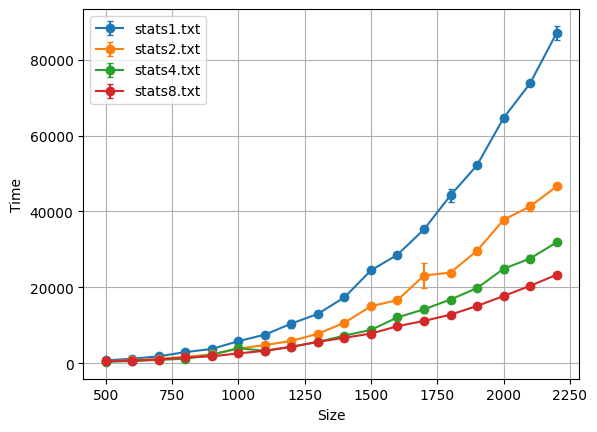

In [4]:
path = "D:\git\multithreading\lab3/utils\stats"
fig = plt.figure()
for file in os.listdir(path):
    # plot_intervals(
    #     *get_intervals(
    #     *readStats(os.path.join(path, file))))
    sizes, intervals = get_intervals(*read_results(os.path.join(path, file)))
    means = [interval[0] for interval in intervals]
    lower_bounds = [interval[1][0] for interval in intervals]
    upper_bounds = [interval[1][1] for interval in intervals]
    plt.errorbar(sizes, means, yerr=[(upper-lower)/2 for upper, lower in zip(upper_bounds, lower_bounds)], fmt='o-', capsize=2, label=file)
    plt.xlabel('Size')
    plt.ylabel('Time')
    plt.grid(True)
    
plt.legend()
plt.show()

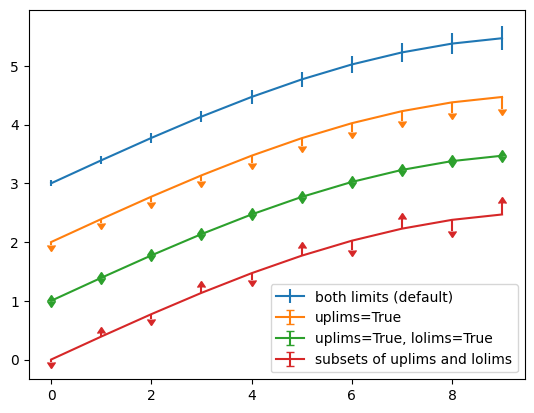

In [60]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

In [33]:
import os
ar = os.listdir("D:/git\multithreading\lab2/res")
print(ar)

['stats_lab2_t_1', 'stats_lab2_t_12', 'stats_lab2_t_2', 'stats_lab2_t_4', 'stats_lab2_t_8']


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\every\AppData\Local\Temp\ipykernel_28480\3183554382.py:2: SyntaxWarning: invalid escape sequence '\m'
  ar = os.listdir("D:/git\multithreading\lab2/res")


In [26]:
a, b = processing(x, y)
print(a)
print(b)
for i in range(0, len(a)): 
    print(a[i],b[i])

[500, 2000, 4500, 8000, 12500, 18000, 24500]
[[37, 37, 38, 38, 38, 38, 39, 41, 43, 56], [242, 243, 244, 244, 245, 247, 248, 254, 258, 278], [784, 784, 784, 789, 793, 793, 797, 809, 811, 851], [1844, 1846, 1853, 1853, 1855, 1865, 1869, 1871, 1873, 1876], [3609, 3614, 3615, 3621, 3648, 3658, 3670, 3678, 3687, 3693], [6299, 6325, 6328, 6335, 6357, 6370, 6370, 6385, 6401, 8762], [10293, 10314, 10329, 10331, 10334, 10342, 10379, 10383, 10420, 10445]]
500 [37, 37, 38, 38, 38, 38, 39, 41, 43, 56]
2000 [242, 243, 244, 244, 245, 247, 248, 254, 258, 278]
4500 [784, 784, 784, 789, 793, 793, 797, 809, 811, 851]
8000 [1844, 1846, 1853, 1853, 1855, 1865, 1869, 1871, 1873, 1876]
12500 [3609, 3614, 3615, 3621, 3648, 3658, 3670, 3678, 3687, 3693]
18000 [6299, 6325, 6328, 6335, 6357, 6370, 6370, 6385, 6401, 8762]
24500 [10293, 10314, 10329, 10331, 10334, 10342, 10379, 10383, 10420, 10445]


In [25]:
print(x)
print(list(set(x)))

[500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 4500, 8000, 8000, 8000, 8000, 8000, 8000, 8000, 8000, 8000, 8000, 12500, 12500, 12500, 12500, 12500, 12500, 12500, 12500, 12500, 12500, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 24500, 24500, 24500, 24500, 24500, 24500, 24500, 24500, 24500, 24500]
[8000, 2000, 18000, 4500, 500, 12500, 24500]


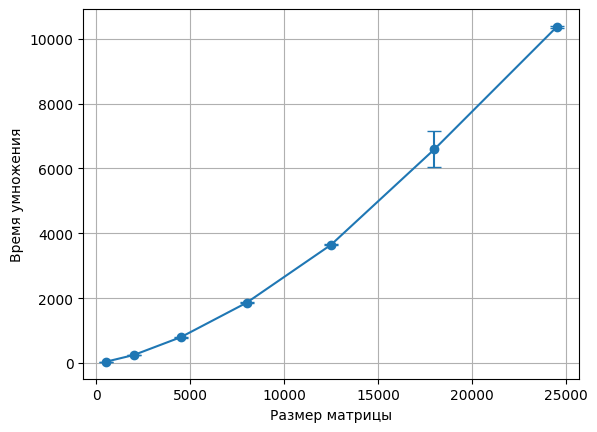

In [28]:
intervals = get_intervals(b)
plot_intervals(a, intervals)


In [44]:
def result(x, y):
    return x * y
# function with normal variables
print (result(10, 100))
 
# A tuple is created
z = (10, 100)
 
# Tuple is passed
# function unpacked them
 
print (result(*z))

1000
1000
